# The first example :- 

In [1]:
import numpy as np
import cv2 
import os
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# takes all images and convert them to grayscale. 
# return a dictionary that holds all images category by category. 
def load_images_from_folder(folder):
    images = {}
    for filename in os.listdir(folder):
        category = []
        path = folder + "/" + filename
        print (path)
        img = cv2.imread(path)
             #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        if img is not None:
                category.append(img)
        images[filename] =images[filename] = category
    return images

images = load_images_from_folder('D:/small_dataset_train/train/Tr1')  # take all images category by category 
test = load_images_from_folder('D:/small_dataset_train/train/Tr3') # take test images

D:/small_dataset_train/train/Tr1/99490.jpg
D:/small_dataset_train/train/Tr1/99644.jpg
D:/small_dataset_train/train/Tr1/99691.jpg
D:/small_dataset_train/train/Tr1/99708.jpg
D:/small_dataset_train/train/Tr1/99749.jpg
D:/small_dataset_train/train/Tr1/99884.jpg
D:/small_dataset_train/train/Tr3/9948.jpg
D:/small_dataset_train/train/Tr3/99503.jpg
D:/small_dataset_train/train/Tr3/99603.jpg
D:/small_dataset_train/train/Tr3/99661.jpg
D:/small_dataset_train/train/Tr3/99744.jpg
D:/small_dataset_train/train/Tr3/99805.jpg
D:/small_dataset_train/train/Tr3/99939.jpg
D:/small_dataset_train/train/Tr3/99948.jpg
D:/small_dataset_train/train/Tr3/99959.jpg
D:/small_dataset_train/train/Tr3/99977.jpg
D:/small_dataset_train/train/Tr3/99985.jpg


In [2]:
# Creates descriptors using sift 
# Takes one parameter that is images dictionary
# Return an array whose first index holds the decriptor_list without an order
# And the second index holds the sift_vectors dictionary which holds the descriptors but this is seperated class by class
def sift_features(images):
    sift_vectors = {}
    descriptor_list = []
    sift = cv2.xfeatures2d.SIFT_create()
    for key,value in images.items():
        features = []
        for img in value:
            kp, des = sift.detectAndCompute(img,None)                       
            descriptor_list.extend(des)
            features.append(des)
        sift_vectors[key] = features
    return [descriptor_list, sift_vectors]

sifts = sift_features(images) 
# Takes the descriptor list which is unordered one
descriptor_list = sifts[0] 
# Takes the sift features that is seperated class by class for train data
all_bovw_feature = sifts[1] 
# Takes the sift features that is seperated class by class for test data
test_bovw_feature = sift_features(test)[1] 

In [3]:
# A k-means clustering algorithm who takes 2 parameter which is number 
# of cluster(k) and the other is descriptors list(unordered 1d array)
# Returns an array that holds central points.
def kmeans(k, descriptor_list):
    kmeans = KMeans(n_clusters = k, n_init=10)
    kmeans.fit(descriptor_list)
    visual_words = kmeans.cluster_centers_ 
    return visual_words
    
# Takes the central points which is visual words    
visual_words = kmeans(160, descriptor_list) 
print(visual_words)

[[20.82692308 10.17307692  9.5        ...  3.59615385  6.07692308
  27.80769231]
 [34.57142857 19.68571429 12.34285714 ... 29.11428571 18.51428571
  10.25714286]
 [17.13043478 23.54347826 15.93478261 ...  5.52173913  6.15217391
   6.2173913 ]
 ...
 [51.11111111 62.25       34.33333333 ... 19.22222222  8.69444444
  13.08333333]
 [31.76315789 24.23684211 13.21052632 ... 28.92105263 27.34210526
  26.15789474]
 [31.86363636 25.06818182 10.22727273 ...  1.81818182  1.95454545
   5.86363636]]


In [17]:
# Takes 2 parameters. The first one is a dictionary that holds the descriptors that are separated class by class 
# And the second parameter is an array that holds the central points (visual words) of the k means clustering
# Returns a dictionary that holds the histograms for each images that are separated class by class. 
def image_class(all_bovw, centers):
    dict_feature = {}
    for key,value in all_bovw.items():
        category = []
        for img in value:
            histogram = np.zeros(len(centers))
            for each_feature in img:
                    ind =  np.where(centers == each_feature)
                                      
                    for j in ind:
                        for i in j:
                           histogram[i] += 1
                        
            category.append(histogram)
        dict_feature[key] = category
    return dict_feature
    
# Creates histograms for train data    
bovw_train = image_class(all_bovw_feature, visual_words) 
# print (bovw_train)
# Creates histograms for test data
bovw_test = image_class(test_bovw_feature, visual_words) 
print (bovw_test)

{'9948.jpg': [array([ 75.,  26.,   0.,  37.,  45.,  76., 122.,  55.,  42.,   0., 164.,
        31.,  48.,  53., 207.,  16.,  55.,   0., 244.,  25.,  76.,  71.,
        48.,  41.,  63.,  17.,  33.,   0.,  37.,  22.,  28.,   6., 125.,
        44.,  38.,  10.,  26.,   8.,   8.,   5.,  71.,  22.,  92.,  31.,
        24., 132.,  23.,  17., 140.,   4.,   0.,  47.,  27.,  61.,   8.,
        24.,  47.,  47.,  63.,  98.,  10.,  29.,  42.,  72.,  34.,  17.,
        23.,  31.,  51.,   0., 115.,  24.,  52.,  19.,   0.,  78.,  46.,
        53.,  45.,  87.,  29.,  35.,  25.,  31.,   9.,  66.,  33.,   9.,
        85.,  12.,  31.,  78.,  79., 218.,  10.,  15.,  35.,   7.,  10.,
        63.,  17., 155.,  37.,  50.,  34.,  58.,  47.,  32.,   5.,   1.,
        27.,  98.,  15.,  28.,  59.,  16.,  38.,  21., 109.,  31.,  90.,
        57.,  11.,  60.,  52., 133.,  58.,  11.,  47.,  13.,  42.,  75.,
        26.,  10.,  42.,  82.,   0.,  31.,  15.,   4.,   0.,   0.,  64.,
        80.,  39.,   0.,  63.,  20., 

In [16]:
# 1-NN algorithm. We use this for predict the class of test images.
# Takes 2 parameters. images is the feature vectors of train images and tests is the feature vectors of test images
# Returns an array that holds number of test images, number of correctly predicted images and records of class based images respectively
def knn(images, tests):
    num_test = 0
    correct_predict = 0
    class_based = {}
    
    for test_key, test_val in tests.items():
        class_based[test_key] = [0, 0] # [correct, all]
        for tst in test_val:
            predict_start = 0
            #print(test_key)
            minimum = 0
            key = "a" #predicted
            for train_key, train_val in images.items():
                for train in train_val:
                    if(predict_start == 0):
                        minimum = distance.euclidean(tst, train)
                        #minimum = L1_dist(tst,train)
                        key = train_key
                        predict_start += 1
                    else:
                        dist = distance.euclidean(tst, train)
                        #dist = L1_dist(tst,train)
                        if(dist < minimum):
                            minimum = dist
                            key = train_key
            
            if(test_key == key):
                correct_predict += 1
                class_based[test_key][0] += 1
            num_test += 1
            class_based[test_key][1] += 1
            #print(minimum)
    return [num_test, correct_predict, class_based]
    
# Call the knn function    
results_bowl = knn(bovw_train, bovw_test) 
print( results_bowl)

[11, 0, {'9948.jpg': [0, 1], '99503.jpg': [0, 1], '99603.jpg': [0, 1], '99661.jpg': [0, 1], '99744.jpg': [0, 1], '99805.jpg': [0, 1], '99939.jpg': [0, 1], '99948.jpg': [0, 1], '99959.jpg': [0, 1], '99977.jpg': [0, 1], '99985.jpg': [0, 1]}]


In [6]:
# Calculates the average accuracy and class based accuracies.  
def accuracy(results):
    avg_accuracy = (results[1] / results[0]) * 100
    print("Average accuracy: %" + str(avg_accuracy))
    print("\nClass based accuracies: \n")
    for key,value in results[2].items():
        acc = (value[0] / value[1]) * 100
        print(key + " : %" + str(acc))
        
# Calculates the accuracies and write the results to the console.       
accuracy(results_bowl) 

Average accuracy: %0.0

Class based accuracies: 

9948.jpg : %0.0
99503.jpg : %0.0
99603.jpg : %0.0
99661.jpg : %0.0
99744.jpg : %0.0
99805.jpg : %0.0
99939.jpg : %0.0
99948.jpg : %0.0
99959.jpg : %0.0
99977.jpg : %0.0
99985.jpg : %0.0


# The ref. for this code is https://medium.com/@aybukeyalcinerr/bag-of-visual-words-bovw-db9500331b2f

# Second example :-

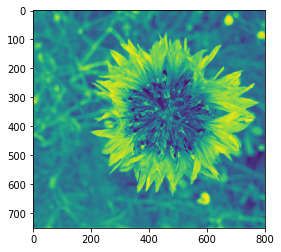

In [7]:
octo_front = cv2.imread('D:/small_dataset_train/train1/133.jpg')
octo_offset = cv2.imread('D:/small_dataset_train/train1/194.jpg')
def show_rgb_img(img):
    """Convenience function to display a typical color image"""
#     imgUMat = cv2.imread(img)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.imshow(gray)
show_rgb_img(octo_front);

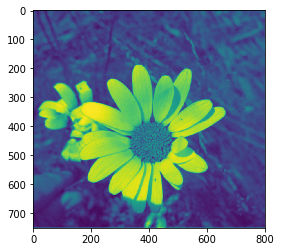

In [8]:
show_rgb_img(octo_offset);

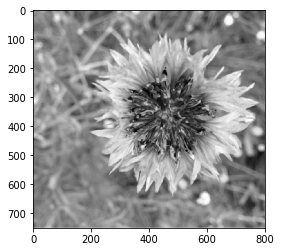

In [9]:
def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

octo_front_gray = to_gray(octo_front)
octo_offset_gray = to_gray(octo_offset)

plt.imshow(octo_front_gray, cmap='gray');

Here are what our SIFT features look like for the front-view flower image:


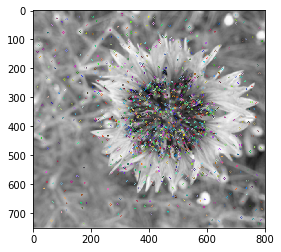

In [10]:
def gen_sift_features(gray_img):
    sift = cv2.xfeatures2d.SIFT_create()
    # kp is the keypoints
    #
    # desc is the SIFT descriptors, they're 128-dimensional vectors
    # that we can use for our final features
    kp, desc = sift.detectAndCompute(gray_img, None)
    return kp, desc

def show_sift_features(gray_img, color_img, kp):
    return plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

# generate SIFT keypoints and descriptors
octo_front_kp, octo_front_desc = gen_sift_features(octo_front_gray)
octo_offset_kp, octo_offset_desc = gen_sift_features(octo_offset_gray)

print ('Here are what our SIFT features look like for the front-view flower image:')
show_sift_features(octo_front_gray, octo_front, octo_front_kp);

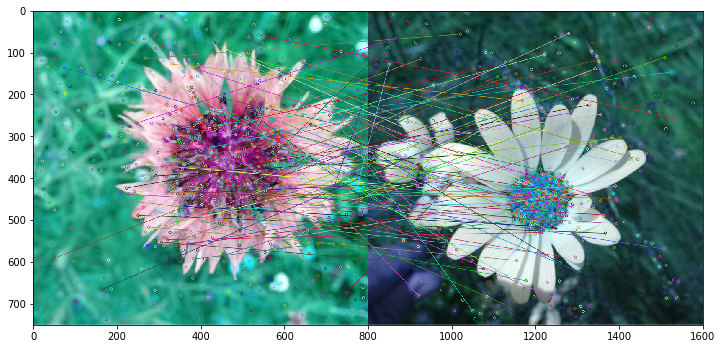

In [11]:
# create a BFMatcher object which will match up the SIFT features
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(octo_front_desc, octo_offset_desc)

# Sort the matches in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# draw the top N matches
N_MATCHES = 100

match_img = cv2.drawMatches(
    octo_front, octo_front_kp,
    octo_offset, octo_offset_kp,
    matches[:N_MATCHES], octo_offset.copy(), flags=0)

plt.figure(figsize=(12,6))
plt.imshow(match_img)

In [12]:
print ('SIFT descriptors are vectors of shape', octo_front_desc[0].shape)
print ('they look like this:')
octo_front_desc[0]

SIFT descriptors are vectors of shape (128,)
they look like this:


array([  5.,   3.,  45.,  84.,  32.,   0.,   0.,   1., 128.,  46.,  33.,
        14.,   3.,   0.,   0.,  21.,  66.,  15.,   4.,   2.,   2.,   2.,
         1.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  16.,
         0.,   0.,  12.,  50.,  75.,  10.,   8., 135.,   7.,   0.,   1.,
         5.,   9.,   5., 100.,  54.,   6.,   3.,   2.,   4.,  29.,  42.,
        52.,   4.,   0.,   0.,   0.,   1.,   2.,  10.,   9.,  12.,   5.,
         2.,  49., 106.,  79.,  14.,   2., 135.,  70.,   4.,  11.,  18.,
         8.,   1.,  12., 117.,  43.,   8.,   0.,   0.,   3.,  11.,  99.,
        32.,   1.,   0.,   0.,   0.,   0.,  18.,  92.,  11.,   5.,   4.,
        94., 111.,   8.,   3.,   4., 135.,  30.,   4.,  14.,   9.,   2.,
         2.,  34., 135.,   8.,   0.,   0.,   0.,   0.,   5., 135.,  52.,
         6.,   6.,   5.,   0.,   0.,  38., 135.], dtype=float32)

In [13]:
print( len(octo_front_kp), 'keypoints in the list')
print (octo_front_kp[0])

1345 keypoints in the list
<KeyPoint 0000000013FBEB70>


In [14]:
def explain_keypoint(kp):
    print ('angle\n', kp.angle)
    print ('\nclass_id\n', kp.class_id)
    print ('\noctave (image scale where feature is strongest)\n', kp.octave)
    print ('\npt (x,y)\n', kp.pt)
    print ('\nresponse\n', kp.response)
    print ('\nsize\n', kp.size)

print ('this is an example of a single SIFT keypoint:\n* * *')
explain_keypoint(octo_front_kp[0])

this is an example of a single SIFT keypoint:
* * *
angle
 202.15513610839844

class_id
 -1

octave (image scale where feature is strongest)
 10289409

pt (x,y)
 (13.444162368774414, 342.6661376953125)

response
 0.013503164052963257

size
 8.280240058898926


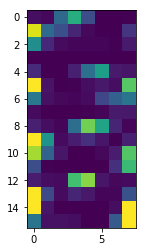

In [15]:
# visualized another way:
plt.imshow(octo_front_desc[0].reshape(16,8), interpolation='none');